# SocialSense: Decoding Digital Emotions Across Meta, Instagram, and Twitter
In today’s digital age, social media platforms have
become the primary channels for expressing emotions and sharing experiences. From joyful mo-
ments like ”Enjoying a beautiful day at the park”
to everyday neutral activities like ”Trying out a
new recipe,” these digital expressions carry valuable emotional context. This project aims to harness the power of machine learning to analyze
and classify sentiments across Facebook, Instagram, and Twitter, transforming casual social media interactions into meaningful insights that help
bridge the gap between human emotion and digital
understanding.

## 1. Importing Python Libraries

In [ ]:
import pandas as pd # Importing all the necessary libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import re
import string

## 2. Examining the data

In [ ]:
sentiment_df = pd.read_csv('/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv') # Examine the dataset
sentiment_df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
sentiment_df['Platform'] = sentiment_df['Platform'].str.strip() # Remove whitespace
sentiment_df['Platform'].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

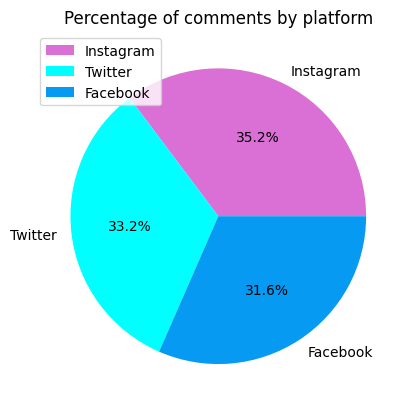

In [ ]:
platform_names = ["Instagram", "Twitter", "Facebook"] # Plots pie-chart of the propotions of comments by platform
plt.pie(sentiment_df['Platform'].value_counts(), labels = platform_names, autopct='%1.1f%%',
       colors=["orchid", "cyan", "#069AF3"])
plt.title("Percentage of comments by platform")
plt.legend(platform_names, loc= 'upper left')

In [ ]:
sentiment_df['Country'] = sentiment_df['Country'].str.strip()
sentiment_df['Country'].value_counts()

Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Sweden              2
Colombia            1
Scotland            1
Kenya               1
Jamaica             1
Ireland             1
China               1
Norway              1
Cambodia            1
Maldives            1
Peru                1
Jordan              1
Thailand            1
Name: count, dtype: int64

<Axes: xlabel='Country'>

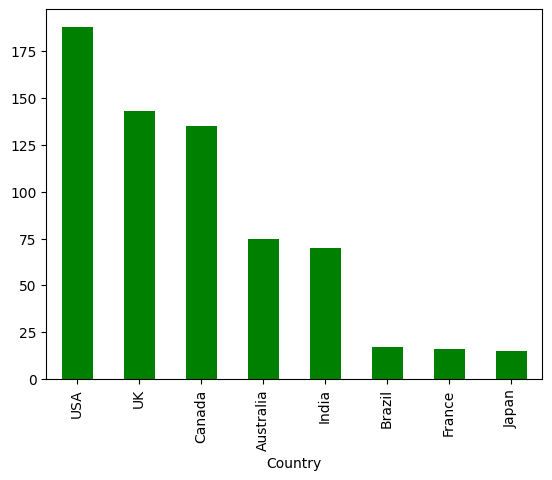

In [ ]:
sentiment_df['Country'].value_counts().nlargest(8).plot(kind='bar', color=["green"]) # Bar-chart showing comments per country

In [ ]:
sentiment_df['Sentiment'].value_counts()
sentiment_df['Sentiment'].value_counts()

Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64

In [ ]:
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].str.strip() # View labels, i.e. the number of comments by emotion
sentiment_df['Sentiment'].value_counts().nlargest(60)

Sentiment
Positive         45
Joy              44
Excitement       37
Contentment      19
Neutral          18
Gratitude        18
Curiosity        16
Serenity         15
Happy            14
Nostalgia        11
Despair          11
Grief             9
Awe               9
Sad               9
Hopeful           9
Loneliness        9
Embarrassed       8
Acceptance        8
Confusion         8
Euphoria          7
Elation           7
Enthusiasm        7
Pride             7
Determination     7
Regret            6
Frustration       6
Ambivalence       6
Melancholy        6
Numbness          6
Playful           6
Indifference      6
Bad               6
Hate              6
Surprise          6
Inspiration       6
Bitterness        5
Frustrated        5
Betrayal          5
Hope              5
Happiness         5
Disgust           5
Inspired          5
Empowerment       5
Proud             4
Grateful          4
Thrill            4
Overwhelmed       4
Compassionate     4
Reflection        4
Enchantmen

## 3. Synonym Replacement
The code below replaces some emotion labels with others to reduce the number of categories for better data analysis.
Most of the replacements are due to synonyms.

In [ ]:
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Positive': 'Happy', 'Joy' : 'Happy', 'Serenity' : 'Happy', 'Euphoria' : 'Happy', 'Elation' : 'Happy', 'Happiness' : 'Happy', 'Playful' : 'Happy', 'Amusement' : 'Happy'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Despair' : 'Sad', 'Grief' : 'Sad', 'Regret' : 'Sad', 'Melancholy' : 'Sad', 'Negative' : 'Sad', 'Bad' : 'Sad', 'Loneliness' : 'Sad', 'Desolation' : 'Sad'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Excitement' : 'Excited', 'Thrill' : 'Excited', 'Adventure' : 'Excited', 'Enthusiasm' : 'Excited', 'Inspired' : 'Excited', 'Inspiration' : 'Excited', 'Arousal' : 'Excited'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Hate' : 'Angry', 'Disgust' : 'Angry', 'Bitterness' : 'Angry', 'Betrayal' : 'Angry', 'Frustration' : 'Angry', 'Frustrated' : 'Angry', 'Anger' : 'Angry'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Pride' : 'Proud', 'Admiration' : 'Proud', 'Awe' : 'Proud', 'Reverence' : 'Proud'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Contentment' : 'Content', 'Acceptance' : 'Content', 'Serenity' : 'Content', 'Fulfillment' : 'Content', 'Calmness' : 'Content', 'Satisfaction' : 'Content'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Indifference' : 'Neutral', 'Numbness' : 'Neutral', 'Indifference' : 'Neutral', 'Ambivalence' : 'Neutral'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Hope' : 'Hopeful', 'Determination' : 'Hopeful', 'Resilience' : 'Hopeful', 'Empowerment' : 'Hopeful'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Shame' : 'Embarassed', 'Embarassment' : 'Embarassed'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Gratitude' : 'Grateful'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Compassionate' : 'Compassion', 'Tenderness' : 'Compassion', 'Empathetic' : 'Compassion'})


In [ ]:
sentiment_df['Sentiment'].value_counts().nlargest(19)

Sentiment
Happy          146
Excited         66
Sad             64
Content         38
Neutral         36
Angry           34
Hopeful         28
Proud           28
Grateful        22
Curiosity       16
Compassion      15
Nostalgia       11
Embarrassed      8
Confusion        8
Surprise         6
Overwhelmed      4
Enchantment      4
Boredom          4
Reflection       4
Name: count, dtype: int64

In [ ]:
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Compassion' : 'Compassionate'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Nostalgia' : 'Nostalgic'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Confusion' : 'Confused'})
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].replace({'Surprise' : 'Surprised'})
sentiment_df['Sentiment'].value_counts().nlargest(15) # Views the modified list

Sentiment
Happy            146
Excited           66
Sad               64
Content           38
Neutral           36
Angry             34
Hopeful           28
Proud             28
Grateful          22
Curiosity         16
Compassionate     15
Nostalgic         11
Embarrassed        8
Confused           8
Surprised          6
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

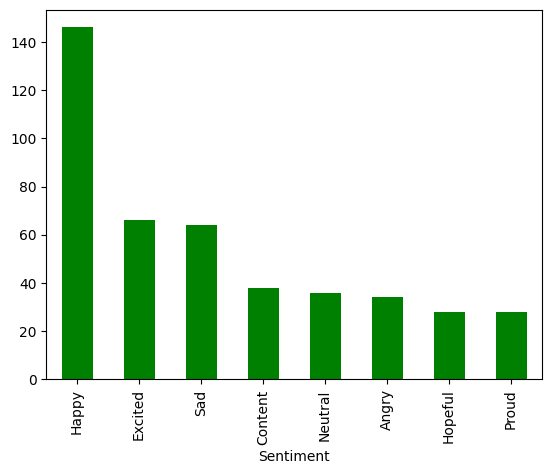

In [ ]:
sentiment_df['Sentiment'].value_counts().nlargest(8).plot(kind='bar', color=["green"])

In [ ]:
sentiment_text = sentiment_df.copy()
sentiment_text = sentiment_text[['Text','Sentiment']]
sentiment_text.head(3)

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Happy
1,Traffic was terrible this morning. ...,Sad
2,Just finished an amazing workout! 💪 ...,Happy


In [ ]:
sentiment_df['Sentiment'].value_counts().nlargest(15)

Sentiment
Happy            146
Excited           66
Sad               64
Content           38
Neutral           36
Angry             34
Hopeful           28
Proud             28
Grateful          22
Curiosity         16
Compassionate     15
Nostalgic         11
Embarrassed        8
Confused           8
Surprised          6
Name: count, dtype: int64

In [ ]:
sentiment_mapper = {0: 'Happy',
                    1: 'Excited',
                    2: 'Sad',
                    3: 'Content',
                    4: 'Neutral',
                    5: 'Angry',
                    6: 'Hopeful',
                    7: 'Proud',
                    8: 'Grateful',
                    9: 'Curiosity',
                    10: 'Compassionate',
                    11: 'Nostalgic',
                    12: 'Embarrassed',
                    13: 'Confused',
                    14: 'Surprised'}

In [ ]:
sentiment_text['Sentiment'].value_counts()

Sentiment
Happy             146
Excited            66
Sad                64
Content            38
Neutral            36
                 ... 
EmotionalStorm      1
Suffering           1
Marvel              1
Spark               1
Freedom             1
Name: count, Length: 144, dtype: int64

## 4. Creating the data sets
Steps used to convert the raw text data into input

In [ ]:
sentiment_text = sentiment_text[sentiment_text['Sentiment'].isin(sentiment_mapper.values())]
df = sentiment_text
df.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Happy
1,Traffic was terrible this morning. ...,Sad
2,Just finished an amazing workout! 💪 ...,Happy
3,Excited about the upcoming weekend getaway! ...,Happy
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [ ]:
df['Sentiment'].value_counts().nlargest(15)

Sentiment
Happy            146
Excited           66
Sad               64
Content           38
Neutral           36
Angry             34
Proud             28
Hopeful           28
Grateful          22
Curiosity         16
Compassionate     15
Nostalgic         11
Confused           8
Embarrassed        8
Surprised          6
Name: count, dtype: int64

In [ ]:
X = df['Text']
y = df['Sentiment']

In [ ]:
train_end = int(tf.floor(0.8*len(X))) # Separate data into train, development and test sets
dev_end = int(tf.floor(0.9*len(X)))
X_train = X[:train_end]
y_train = y[:train_end]
X_dev = X[train_end:dev_end]
y_dev = y[train_end:dev_end]
X_test = X[dev_end:]
y_test = y[dev_end:]

In [ ]:
print(len(y_train)) # See the size of each set
print(len(y_dev))
print(len(y_test))

420
53
53


In [ ]:
print(y.unique())

['Happy' 'Sad' 'Neutral' 'Angry' 'Proud' 'Surprised' 'Content' 'Confused'
 'Excited' 'Grateful' 'Hopeful' 'Compassionate' 'Curiosity' 'Nostalgic'
 'Embarrassed']


In [ ]:
df.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Happy
1,Traffic was terrible this morning. ...,Sad
2,Just finished an amazing workout! 💪 ...,Happy
3,Excited about the upcoming weekend getaway! ...,Happy
4,Trying out a new recipe for dinner tonight. ...,Neutral


## 5. Building the model
Word embeddings are used for the input sentences, converting each into an array of integers which stand for each word in the sentence. After than an LSTM model is used to process the results.

## Model 1: Naive Bayes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns

In [ ]:
# First split: 80% train, 20% temp (for val and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Second split: Split temp into equal parts for val and test (10% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42
)

print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 420
Validation set size: 53
Test set size: 53


In [ ]:
# Create a pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Define hyperparameters to tune
param_grid = {
    'vectorizer__max_df': [0.5, 0.75, 1.0],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.1, 0.5, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

In [ ]:
# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)
classes = grid_search.best_estimator_.classes_

# Print best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'classifier__alpha': 0.1, 'vectorizer__max_df': 0.75, 'vectorizer__ngram_range': (1, 1)}


Validation Accuracy: 0.5849056603773585

Classification Report (Validation):
               precision    recall  f1-score   support

        Angry       1.00      1.00      1.00         1
Compassionate       1.00      0.33      0.50         3
      Content       0.00      0.00      0.00         1
    Curiosity       0.00      0.00      0.00         1
  Embarrassed       1.00      1.00      1.00         1
      Excited       0.86      0.55      0.67        11
     Grateful       1.00      0.50      0.67         2
        Happy       0.52      0.80      0.63        15
      Hopeful       1.00      0.75      0.86         4
      Neutral       0.83      0.56      0.67         9
    Nostalgic       0.00      0.00      0.00         0
        Proud       0.00      0.00      0.00         1
          Sad       0.50      0.33      0.40         3
    Surprised       0.00      0.00      0.00         1

     accuracy                           0.58        53
    macro avg       0.55      0.42      0

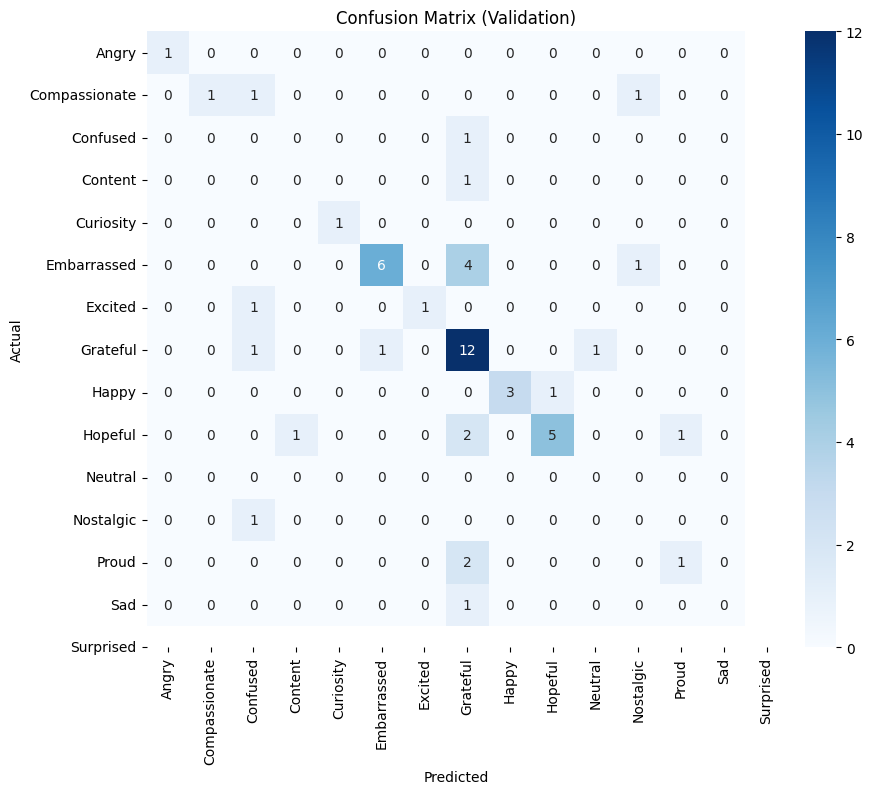

In [ ]:
# Make predictions on validation set
y_val_pred = grid_search.predict(X_val)

# Calculate and print accuracy
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")

# Print detailed classification report
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred, zero_division=0))

# Create confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix (Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Test Accuracy: 0.5471698113207547

Classification Report (Test):
               precision    recall  f1-score   support

        Angry       1.00      0.75      0.86         4
Compassionate       1.00      0.67      0.80         3
     Confused       0.00      0.00      0.00         1
      Content       1.00      0.33      0.50         3
    Curiosity       0.00      0.00      0.00         0
  Embarrassed       0.00      0.00      0.00         0
      Excited       0.50      0.25      0.33         8
     Grateful       0.67      0.67      0.67         3
        Happy       0.59      0.59      0.59        17
      Hopeful       0.67      0.67      0.67         3
      Neutral       0.00      0.00      0.00         1
    Nostalgic       0.00      0.00      0.00         0
        Proud       1.00      0.67      0.80         3
          Sad       0.62      0.83      0.71         6
    Surprised       0.00      0.00      0.00         1

     accuracy                           0.55        5

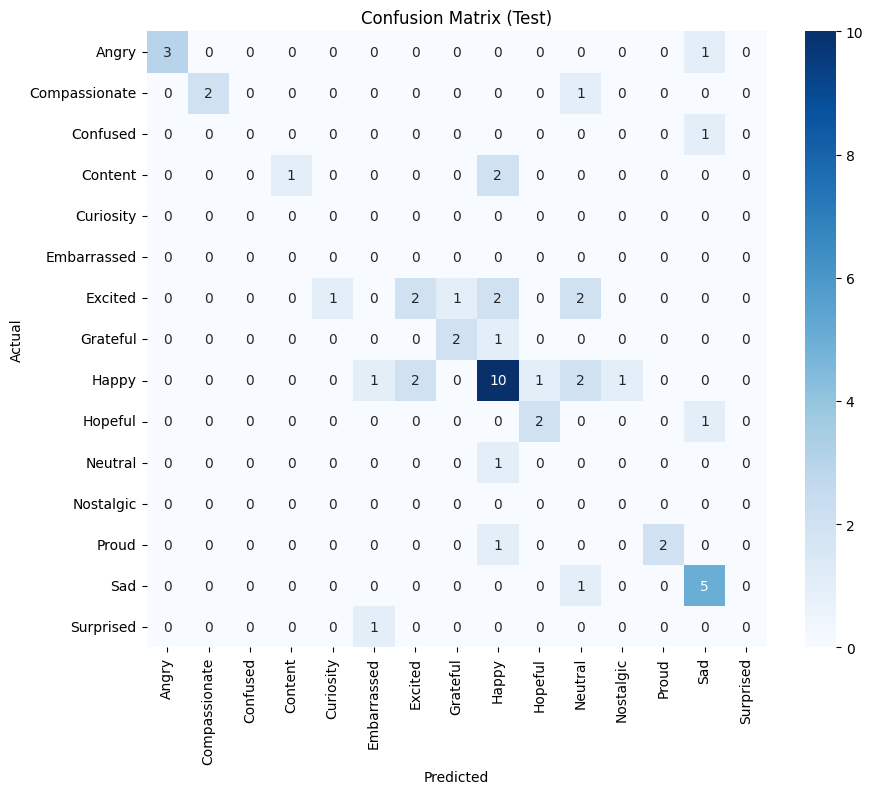

In [ ]:
# Make predictions on test set
y_test_pred = grid_search.predict(X_test)

# Calculate and print accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

# Print detailed classification report
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Create confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model 2: Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# First split: 80% train, 20% temp (for val and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Second split: Split temp into equal parts for val and test (10% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42
)

# Vectorize the text
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Create and train the model
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Validation Accuracy: 0.5471698113207547

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.86      0.55      0.67        11
           7       1.00      0.50      0.67         2
           8       0.42      0.93      0.58        15
           9       1.00      0.50      0.67         4
          10       1.00      0.33      0.50         9
          12       0.00      0.00      0.00         1
          13       0.33      0.33      0.33         3
          14       0.00      0.00      0.00         1

    accuracy                           0.55        53
   macro avg       0.51      0.34      0.38        53
weighted avg       0.68      0.55      0.53        53



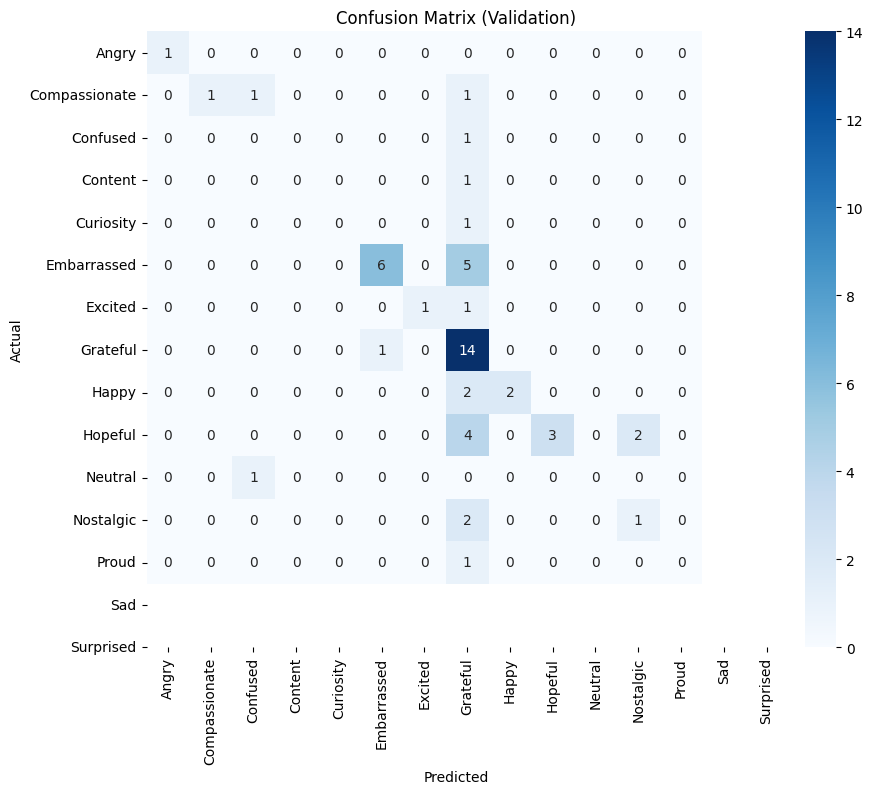

In [ ]:
# Make predictions
X_val = vectorizer.transform(X_val)
y_val = label_encoder.transform(y_val)
y_pred = lr_classifier.predict(X_val)

# Print performance metrics
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred)}")

# Print detailed classification report
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_pred, zero_division=0))

# Create confusion matrix
cm_val = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Validation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Test Accuracy: 0.5849056603773585

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       1.00      0.33      0.50         3
           6       1.00      0.12      0.22         8
           7       1.00      0.67      0.80         3
           8       0.47      1.00      0.64        17
           9       1.00      0.67      0.80         3
          10       0.00      0.00      0.00         1
          12       1.00      0.67      0.80         3
          13       0.50      0.50      0.50         6
          14       0.00      0.00      0.00         1

    accuracy                           0.58        53
   macro avg       0.58      0.39      0.43        53
weighted avg       0.66      0.58      0.52        53



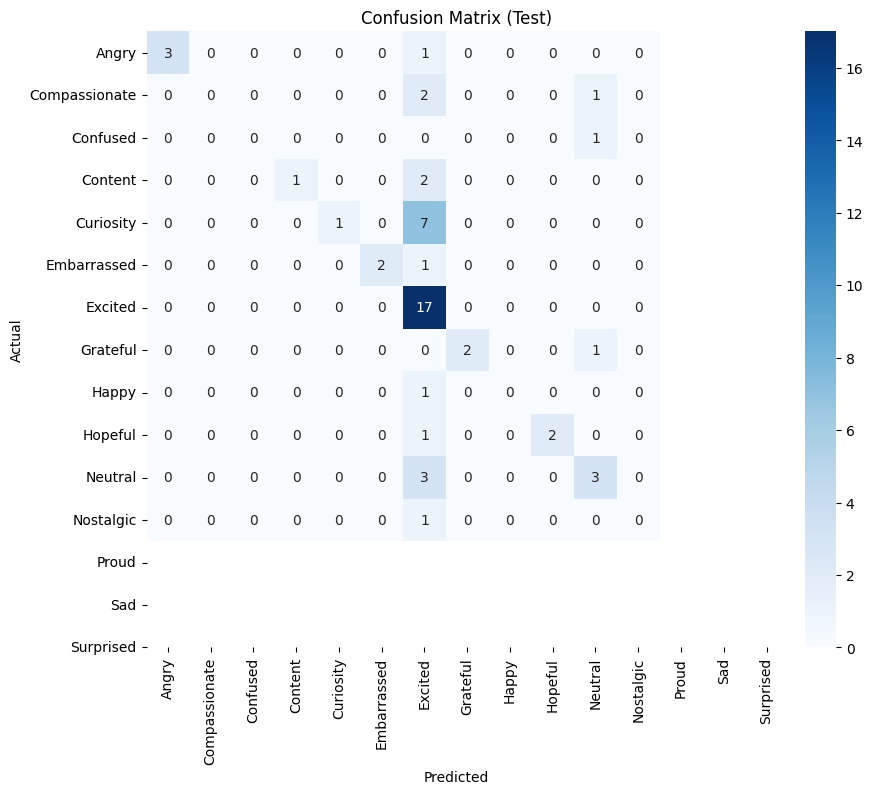

In [ ]:
# Make predictions
X_test = vectorizer.transform(X_test)
y_test = label_encoder.transform(y_test)
y_pred = lr_classifier.predict(X_test)

# Print performance metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

# Print detailed classification report
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred, zero_division=0))

# Create confusion matrix
cm_val = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model 3: LSTM

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# First split: 80% train, 20% temp (for val and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Second split: Split temp into equal parts for val and test (10% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42
)

# Prepare the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

# Pad sequences to same length
max_length = 20
X_train = pad_sequences(X_train, maxlen=max_length)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train = tf.keras.utils.to_categorical(y_train)



# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 64),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model

# Prepare the data=
X_val = tokenizer.texts_to_sequences(X_val)

# Pad sequences to same length
max_length = 20
X_val = pad_sequences(X_val, maxlen=max_length)

# Encode labels
y_val = label_encoder.transform(y_val)
y_val = tf.keras.utils.to_categorical(y_val)

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.2411 - loss: 2.6782 - val_accuracy: 0.2830 - val_loss: 2.5224
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2634 - loss: 2.4587 - val_accuracy: 0.2830 - val_loss: 2.4772
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2578 - loss: 2.3711 - val_accuracy: 0.2830 - val_loss: 2.3638
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3054 - loss: 2.2833 - val_accuracy: 0.2830 - val_loss: 2.3054
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3024 - loss: 2.2650 - val_accuracy: 0.2830 - val_loss: 2.3296
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2983 - loss: 2.1864 - val_accuracy: 0.2830 - val_loss: 2.2412
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3647 - loss: 1.9894 - val_accuracy: 0.3019 - val_loss: 2.5315
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4329 - loss: 1.8351 - val_accuracy: 0.3962 - v

In [ ]:
# Evaluate model

# Prepare the data=
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences to same length
max_length = 20
X_test = pad_sequences(X_test, maxlen=max_length)

# Encode labels
y_test = label_encoder.transform(y_test)
y_test = tf.keras.utils.to_categorical(y_test)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5106 - loss: 2.3478
Test accuracy: 0.5471698045730591


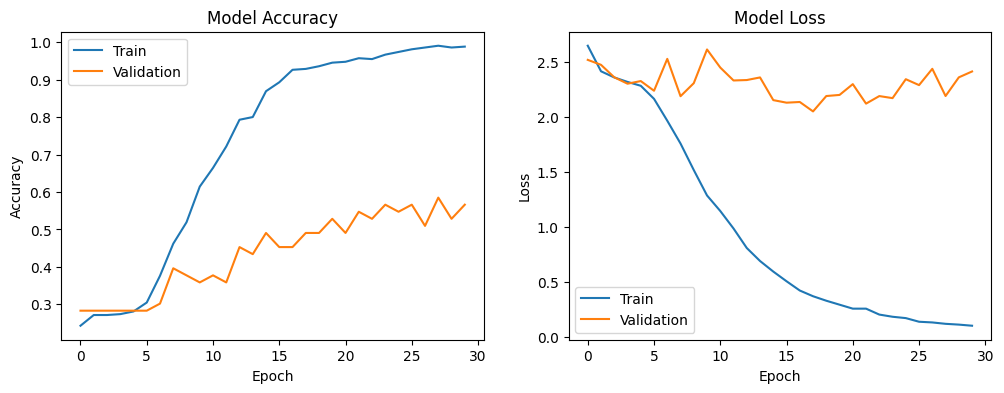

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Model 4: LSTM using GLoVE embeddings

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_words = 10000  # Maximum number of words to keep in tokenizer
max_length = 20    # Maximum sequence length
embedding_dim = 100

# Split the data into train, validation, and test sets (80-10-10 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Tokenize text (fit only on training data)
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Encode labels (fit only on training labels to avoid data leakage)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit only on training data
y_val_encoded = label_encoder.transform(y_val)          # Transform validation labels
y_test_encoded = label_encoder.transform(y_test)        # Transform test labels

# Convert labels to categorical (one-hot encoding)
num_classes = len(label_encoder.classes_)  # Number of unique classes in training data
y_train_cat = tf.keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val_encoded, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)

# Load pre-trained GloVe embeddings
embeddings_index = {}
with open('/kaggle/input/glove-6b-100/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix (map words in tokenizer to GloVe embeddings)
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim,
                              weights=[embedding_matrix],
                              trainable=False),  # Use pre-trained embeddings without updating them
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer matches number of classes
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model with validation data
history = model.fit(X_train_pad, y_train_cat,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val_pad, y_val_cat),
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=3,
                            restore_best_weights=True
                        )
                    ])

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - accuracy: 0.2272 - loss: 2.5153 - val_accuracy: 0.2830 - val_loss: 2.2789
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.3066 - loss: 2.1594 - val_accuracy: 0.3019 - val_loss: 2.0078
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.4745 - loss: 1.6820 - val_accuracy: 0.3774 - val_loss: 2.0671
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.5419 - loss: 1.3428 - val_accuracy: 0.3962 - val_loss: 1.7335
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.6568 - loss: 1.0556 - val_accuracy: 0.3962 - val_loss: 1.6227
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.7571 - loss: 0.7118 - val_accuracy: 0.4528 - val_loss: 1.8032
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.7772 - loss: 0.7053 - val_accuracy: 0.5283 - val_loss: 1.6498
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.7861 - loss: 0.5380 - val_accuracy: 0

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6004 - loss: 1.6930
Test Accuracy: 0.6038


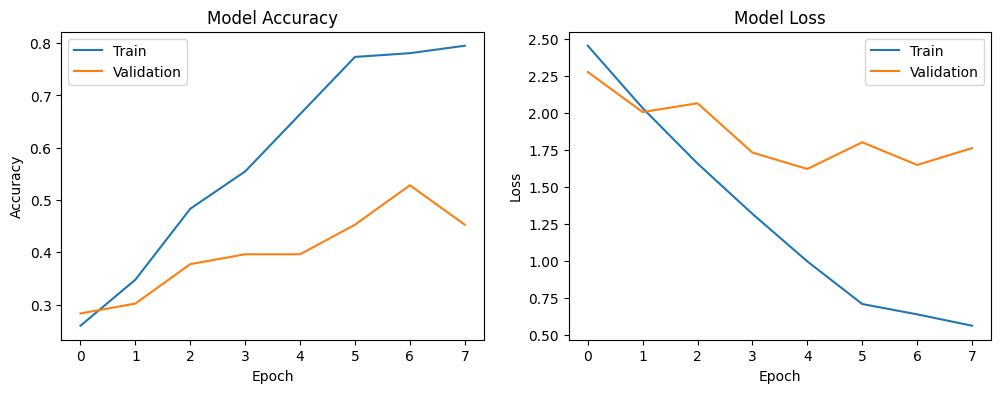

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Model 5: BERT

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set device and random seed
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

# Split data first - 80% train, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(
    sentiment_text['Text'], sentiment_text['Sentiment'],
    test_size=0.2, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5, random_state=42
)

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128  # Adjust based on your text lengths

# Encode labels using only training data
label_encoder = LabelEncoder()
y_train = torch.tensor(label_encoder.fit_transform(y_train))
y_val = torch.tensor(label_encoder.transform(y_val))
y_test = torch.tensor(label_encoder.transform(y_test))

num_labels = len(label_encoder.classes_)

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels,
    output_attentions=False,
    output_hidden_states=False
)
model.to(device)

# Function to encode text data
def encode_texts(texts):
    return tokenizer.batch_encode_plus(
        texts,
        add_special_tokens=True,
        return_attention_mask=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='pt',
        truncation=True
    )

# Encode data
X_train_encoded = encode_texts(X_train)
X_val_encoded = encode_texts(X_val)
X_test_encoded = encode_texts(X_test)

# Create DataLoaders
batch_size = 16

train_data = TensorDataset(X_train_encoded['input_ids'], X_train_encoded['attention_mask'], y_train)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = TensorDataset(X_val_encoded['input_ids'], X_val_encoded['attention_mask'], y_val)
val_loader = DataLoader(val_data, batch_size=batch_size)

test_data = TensorDataset(X_test_encoded['input_ids'], X_test_encoded['attention_mask'], y_test)
test_loader = DataLoader(test_data, batch_size=batch_size)


# Training setup
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.LinearLR(optimizer)
criterion = torch.nn.CrossEntropyLoss()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Training loop
epochs = 10
best_accuracy = 0

for epoch in range(epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}')

    for batch in progress_bar:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        progress_bar.set_postfix({'loss': f'{loss.item():.3f}'})

    # Validation
    model.eval()
    val_accuracy = 0
    val_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

            val_loss += outputs.loss.item()
            preds = torch.argmax(outputs.logits, dim=1)
            val_accuracy += (preds == labels).sum().item()

    val_accuracy = val_accuracy / len(val_loader.dataset)
    print(f'Epoch {epoch + 1}:')
    print(f'Average training loss: {total_loss/len(train_loader):.3f}')
    print(f'Validation Accuracy: {val_accuracy:.3f}')

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model.pt')

print(f'Best validation accuracy: {best_accuracy:.3f}')

Epoch 1: 100%|██████████| 27/27 [04:19<00:00,  9.60s/it, loss=2.139]


Epoch 1:
Average training loss: 2.644
Validation Accuracy: 0.283


Epoch 2: 100%|██████████| 27/27 [04:19<00:00,  9.62s/it, loss=2.505]


Epoch 2:
Average training loss: 2.239
Validation Accuracy: 0.283


Epoch 3: 100%|██████████| 27/27 [04:15<00:00,  9.48s/it, loss=1.477]


Epoch 3:
Average training loss: 1.921
Validation Accuracy: 0.396


Epoch 4: 100%|██████████| 27/27 [04:18<00:00,  9.57s/it, loss=1.226]


Epoch 4:
Average training loss: 1.618
Validation Accuracy: 0.415


Epoch 5: 100%|██████████| 27/27 [04:20<00:00,  9.64s/it, loss=0.979]


Epoch 5:
Average training loss: 1.279
Validation Accuracy: 0.566


Epoch 6: 100%|██████████| 27/27 [04:16<00:00,  9.49s/it, loss=0.665]


Epoch 6:
Average training loss: 0.962
Validation Accuracy: 0.660


Epoch 7: 100%|██████████| 27/27 [04:19<00:00,  9.59s/it, loss=0.544]


Epoch 7:
Average training loss: 0.708
Validation Accuracy: 0.717


Epoch 8: 100%|██████████| 27/27 [04:17<00:00,  9.52s/it, loss=0.161]


Epoch 8:
Average training loss: 0.468
Validation Accuracy: 0.755


Epoch 9: 100%|██████████| 27/27 [04:21<00:00,  9.68s/it, loss=0.113]


Epoch 9:
Average training loss: 0.306
Validation Accuracy: 0.774


Epoch 10: 100%|██████████| 27/27 [04:17<00:00,  9.55s/it, loss=0.071]


Epoch 10:
Average training loss: 0.198
Validation Accuracy: 0.774
Best validation accuracy: 0.774


Test Accuracy: 0.849

Classification Report:
               precision    recall  f1-score   support

        Angry       0.80      1.00      0.89         4
Compassionate       1.00      1.00      1.00         3
     Confused       1.00      1.00      1.00         1
      Content       1.00      0.67      0.80         3
    Curiosity       0.00      0.00      0.00         0
  Embarrassed       0.00      0.00      0.00         0
      Excited       1.00      0.50      0.67         8
     Grateful       1.00      1.00      1.00         3
        Happy       0.77      1.00      0.87        17
      Hopeful       1.00      0.67      0.80         3
      Neutral       0.33      1.00      0.50         1
    Nostalgic       0.00      0.00      0.00         0
        Proud       1.00      1.00      1.00         3
          Sad       1.00      0.83      0.91         6
    Surprised       0.00      0.00      0.00         1

    micro avg       0.85      0.85      0.85        53
    macro avg     

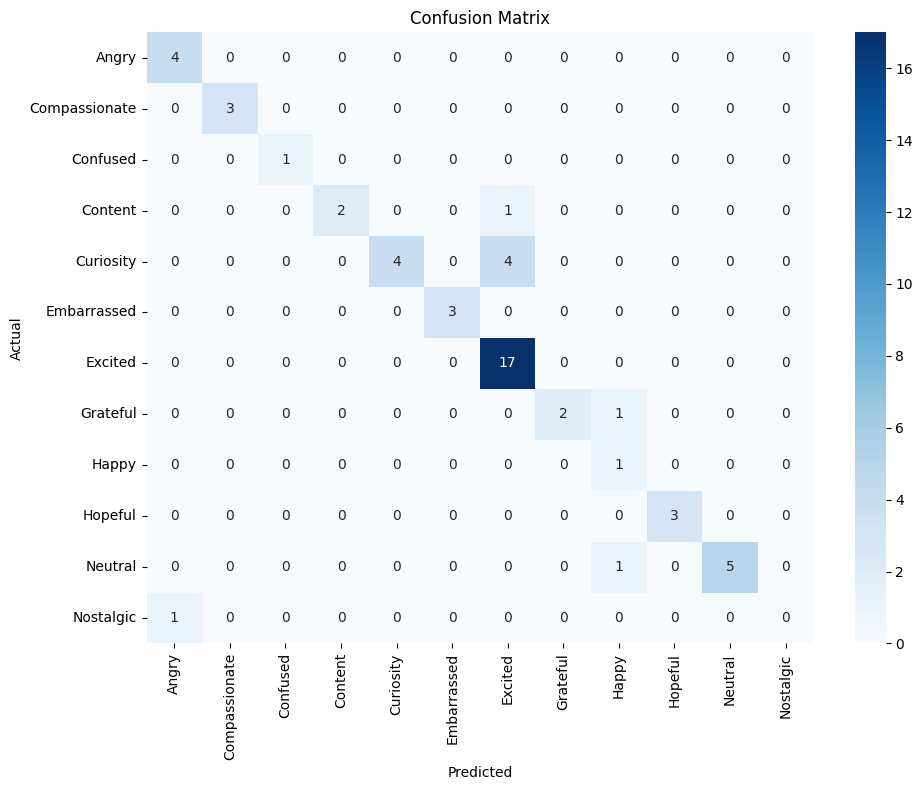

In [ ]:
# Calculate accuracy
test_accuracy = accuracy_score(true_labels, test_predictions)
print(f'Test Accuracy: {test_accuracy:.3f}')

# Print classification report with zero_division parameter
print('\nClassification Report:')
print(classification_report(true_labels, test_predictions,
                          labels=np.arange(len(label_encoder.classes_)),
                          target_names=label_encoder.classes_,
                          zero_division=0))

# Create confusion matrix
cm = confusion_matrix(true_labels, test_predictions)

# Get mask for non-zero entries
mask = np.any(cm != 0, axis=1) | np.any(cm != 0, axis=0)

# Filter classes and confusion matrix
active_classes = [label_encoder.classes_[i] for i in range(cm.shape[0]) if mask[i]]
cm_filtered = cm[mask][:, mask]

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_filtered,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=active_classes,
            yticklabels=active_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### BERT proves to perform the best as compared to other models as it has the contextual understanding ability